In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
piama = pd.read_csv('pima-indians-diabetes.csv',skiprows=9,header=None,names=['Pregnencies','Glucose','BP',
                                                                                          'skin thickness','insulin','BMI','DPF','Age','Outcome'])

In [3]:
piama.head()

,Pregnencies,Glucose,BP,skin thickness,insulin,BMI,DPF,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3ac745c710>,
      dtype=object)

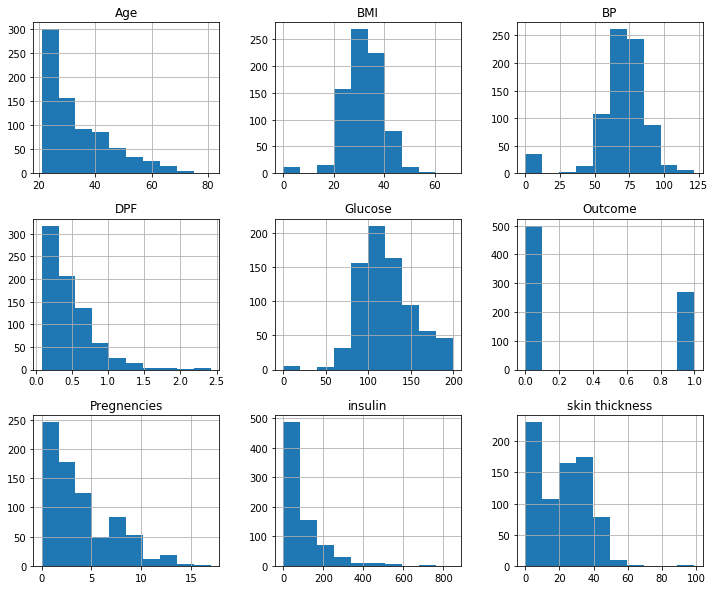

In [4]:
piama.hist(figsize=(12,10))

<Figure size 2592x2520 with 0 Axes>

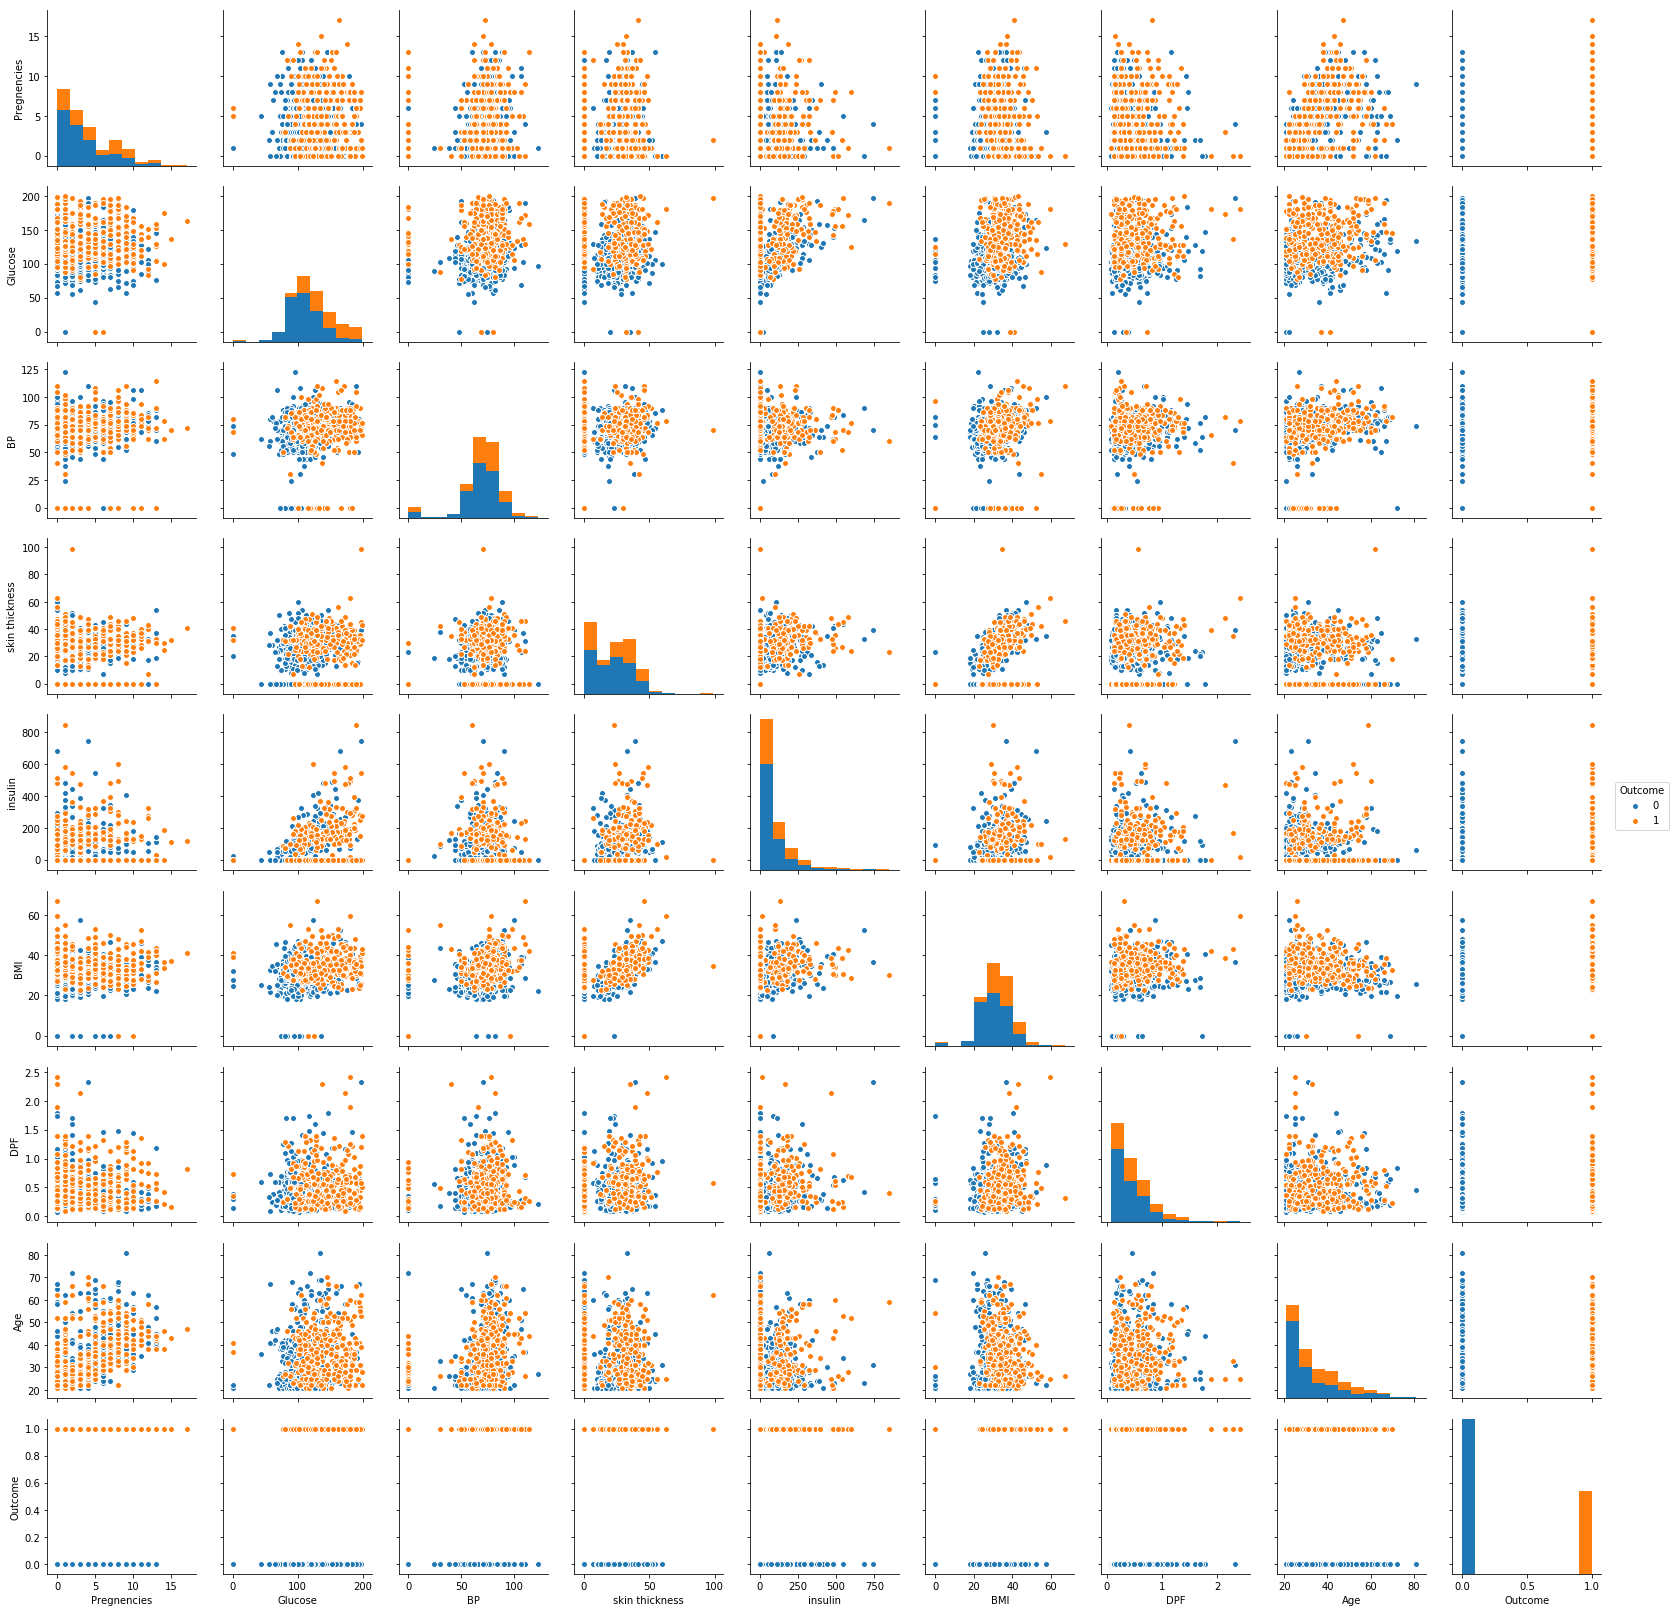

In [5]:
import seaborn as sns
plt.figure(figsize = (36,35))
sns.pairplot(piama,hue='Outcome')

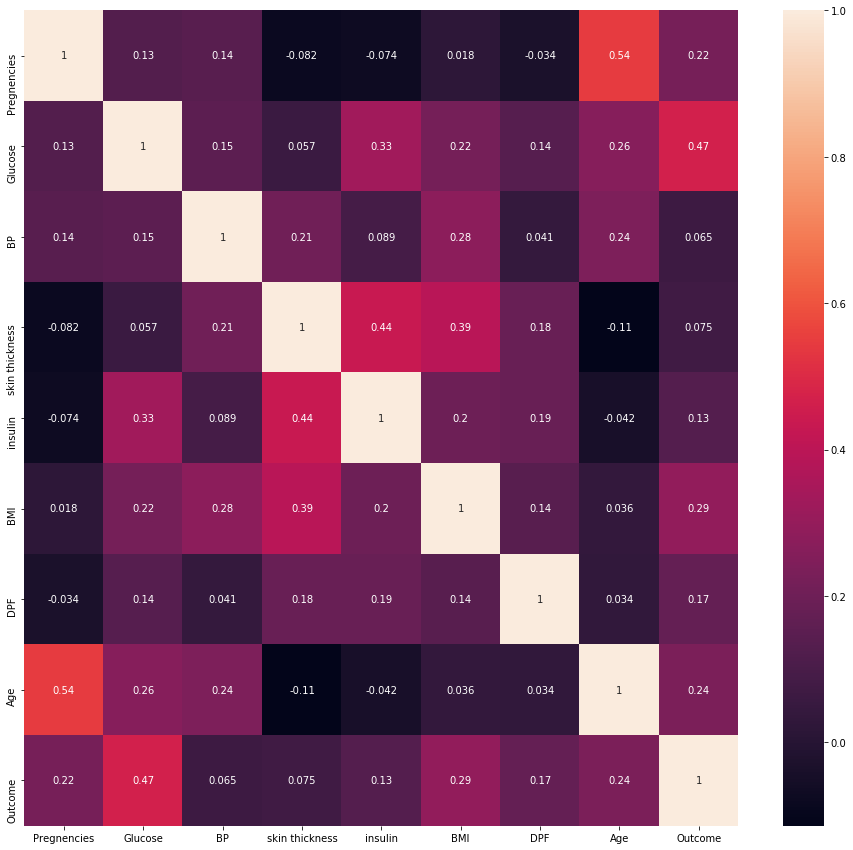

In [6]:
plt.figure(figsize = (16,15))
sns.heatmap(piama.corr(),annot=True)

In [7]:
piama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnencies       768 non-null int64
Glucose           768 non-null int64
BP                768 non-null int64
skin thickness    768 non-null int64
insulin           768 non-null int64
BMI               768 non-null float64
DPF               768 non-null float64
Age               768 non-null int64
Outcome           768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
piama.describe()

,Pregnencies,Glucose,BP,skin thickness,insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
from sklearn.preprocessing import StandardScaler
from keras.utils import to_categorical

Using TensorFlow backend.


In [10]:
sc = StandardScaler()
X= sc.fit_transform(piama.drop('Outcome',axis=1))
y=piama.Outcome.values
y_cat = to_categorical(y)


In [11]:
X.shape

(768, 8)

In [12]:
y_cat.shape

(768, 2)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y_cat,test_size=0.2)

In [15]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [24]:
model = Sequential()
model.add(Dense(32, input_shape=(8,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(Adam(lr=0.05),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.fit(X_train,y_train,epochs=500,validation_split=0.1)

Train on 552 samples, validate on 62 samples
Epoch 1/500
552/552 [==============================] - 0s 834us/step - loss: 0.5772 - acc: 0.7011 - val_loss: 0.5631 - val_acc: 0.6935
Epoch 2/500
552/552 [==============================] - 0s 169us/step - loss: 0.4633 - acc: 0.7826 - val_loss: 0.5131 - val_acc: 0.7742
Epoch 3/500
552/552 [==============================] - 0s 317us/step - loss: 0.4782 - acc: 0.7790 - val_loss: 0.5040 - val_acc: 0.6935
Epoch 4/500
552/552 [==============================] - 0s 199us/step - loss: 0.4716 - acc: 0.7609 - val_loss: 0.5954 - val_acc: 0.6613
Epoch 5/500
552/552 [==============================] - 0s 198us/step - loss: 0.4560 - acc: 0.7772 - val_loss: 0.5185 - val_acc: 0.7581
Epoch 6/500
552/552 [==============================] - 0s 330us/step - loss: 0.4613 - acc: 0.7917 - val_loss: 0.4957 - val_acc: 0.7419
Epoch 7/500
552/552 [==============================] - 0s 196us/step - loss: 0.4354 - acc: 0.7953 - val_loss: 0.6161 - val_acc: 0.7258
Epoch 8/50

Epoch 61/500
552/552 [==============================] - 0s 323us/step - loss: 0.3353 - acc: 0.8170 - val_loss: 0.8047 - val_acc: 0.7097
Epoch 62/500
552/552 [==============================] - 0s 188us/step - loss: 0.3185 - acc: 0.8152 - val_loss: 1.0268 - val_acc: 0.7258
Epoch 63/500
552/552 [==============================] - 0s 196us/step - loss: 0.3261 - acc: 0.8315 - val_loss: 0.8548 - val_acc: 0.6774
Epoch 64/500
552/552 [==============================] - 0s 320us/step - loss: 0.3112 - acc: 0.8152 - val_loss: 0.9324 - val_acc: 0.6613
Epoch 65/500
552/552 [==============================] - 0s 195us/step - loss: 0.2997 - acc: 0.8279 - val_loss: 0.9166 - val_acc: 0.6774
Epoch 66/500
552/552 [==============================] - 0s 198us/step - loss: 0.2971 - acc: 0.8261 - val_loss: 0.8874 - val_acc: 0.7097
Epoch 67/500
552/552 [==============================] - 0s 196us/step - loss: 0.3760 - acc: 0.8116 - val_loss: 0.7796 - val_acc: 0.6613
Epoch 68/500
552/552 [==========================

552/552 [==============================] - 0s 195us/step - loss: 0.2608 - acc: 0.8587 - val_loss: 1.4322 - val_acc: 0.6452
Epoch 122/500
552/552 [==============================] - 0s 202us/step - loss: 0.3345 - acc: 0.8315 - val_loss: 1.3659 - val_acc: 0.6452
Epoch 123/500
552/552 [==============================] - 0s 326us/step - loss: 0.3367 - acc: 0.7862 - val_loss: 1.4297 - val_acc: 0.6290
Epoch 124/500
552/552 [==============================] - 0s 196us/step - loss: 0.2930 - acc: 0.7899 - val_loss: 1.5394 - val_acc: 0.6613
Epoch 125/500
552/552 [==============================] - 0s 197us/step - loss: 0.2587 - acc: 0.8514 - val_loss: 1.6583 - val_acc: 0.6774
Epoch 126/500
552/552 [==============================] - 0s 322us/step - loss: 0.2799 - acc: 0.8514 - val_loss: 1.3000 - val_acc: 0.7097
Epoch 127/500
552/552 [==============================] - 0s 194us/step - loss: 0.3062 - acc: 0.8496 - val_loss: 1.1668 - val_acc: 0.7097
Epoch 128/500
552/552 [==============================] 

Epoch 181/500
552/552 [==============================] - 0s 198us/step - loss: 0.2558 - acc: 0.8623 - val_loss: 1.3373 - val_acc: 0.7097
Epoch 182/500
552/552 [==============================] - 0s 193us/step - loss: 0.2987 - acc: 0.8370 - val_loss: 1.0750 - val_acc: 0.6452
Epoch 183/500
552/552 [==============================] - 0s 197us/step - loss: 0.2658 - acc: 0.8478 - val_loss: 1.2219 - val_acc: 0.6452
Epoch 184/500
552/552 [==============================] - 0s 324us/step - loss: 0.2752 - acc: 0.8496 - val_loss: 1.3225 - val_acc: 0.6613
Epoch 185/500
552/552 [==============================] - 0s 195us/step - loss: 0.2670 - acc: 0.8533 - val_loss: 1.8883 - val_acc: 0.6452
Epoch 186/500
552/552 [==============================] - 0s 197us/step - loss: 0.2901 - acc: 0.8569 - val_loss: 1.6041 - val_acc: 0.5968
Epoch 187/500
552/552 [==============================] - 0s 322us/step - loss: 0.2931 - acc: 0.8641 - val_loss: 1.7925 - val_acc: 0.6129
Epoch 188/500
552/552 [==================

Epoch 241/500
552/552 [==============================] - 0s 203us/step - loss: 0.2487 - acc: 0.8623 - val_loss: 2.3598 - val_acc: 0.6613
Epoch 242/500
552/552 [==============================] - 0s 193us/step - loss: 0.2454 - acc: 0.8641 - val_loss: 2.3301 - val_acc: 0.6935
Epoch 243/500
552/552 [==============================] - 0s 196us/step - loss: 0.2313 - acc: 0.8696 - val_loss: 2.2467 - val_acc: 0.6935
Epoch 244/500
552/552 [==============================] - 0s 199us/step - loss: 0.2418 - acc: 0.8678 - val_loss: 2.0655 - val_acc: 0.6935
Epoch 245/500
552/552 [==============================] - 0s 198us/step - loss: 0.2728 - acc: 0.8533 - val_loss: 1.8795 - val_acc: 0.6774
Epoch 246/500
552/552 [==============================] - 0s 321us/step - loss: 0.3209 - acc: 0.8587 - val_loss: 2.0232 - val_acc: 0.6935
Epoch 247/500
552/552 [==============================] - 0s 200us/step - loss: 0.3722 - acc: 0.8370 - val_loss: 1.4903 - val_acc: 0.6290
Epoch 248/500
552/552 [==================

Epoch 301/500
552/552 [==============================] - 0s 316us/step - loss: 0.2327 - acc: 0.8587 - val_loss: 2.2366 - val_acc: 0.5968
Epoch 302/500
552/552 [==============================] - 0s 197us/step - loss: 0.2272 - acc: 0.8659 - val_loss: 2.3700 - val_acc: 0.6452
Epoch 303/500
552/552 [==============================] - 0s 197us/step - loss: 0.2131 - acc: 0.8732 - val_loss: 1.9955 - val_acc: 0.7097
Epoch 304/500
552/552 [==============================] - 0s 317us/step - loss: 0.2587 - acc: 0.8551 - val_loss: 1.9425 - val_acc: 0.6935
Epoch 305/500
552/552 [==============================] - 0s 212us/step - loss: 0.2451 - acc: 0.8496 - val_loss: 1.9954 - val_acc: 0.6613
Epoch 306/500
552/552 [==============================] - 0s 189us/step - loss: 0.2337 - acc: 0.8732 - val_loss: 2.1200 - val_acc: 0.6613
Epoch 307/500
552/552 [==============================] - 0s 326us/step - loss: 0.2320 - acc: 0.8714 - val_loss: 2.1372 - val_acc: 0.6290
Epoch 308/500
552/552 [==================

Epoch 361/500
552/552 [==============================] - 0s 328us/step - loss: 0.2112 - acc: 0.8786 - val_loss: 1.7543 - val_acc: 0.7258
Epoch 362/500
552/552 [==============================] - 0s 196us/step - loss: 0.2155 - acc: 0.8786 - val_loss: 1.8646 - val_acc: 0.7258
Epoch 363/500
552/552 [==============================] - 0s 327us/step - loss: 0.2175 - acc: 0.8786 - val_loss: 1.7158 - val_acc: 0.7742
Epoch 364/500
552/552 [==============================] - 0s 194us/step - loss: 0.2096 - acc: 0.8786 - val_loss: 1.6944 - val_acc: 0.7742
Epoch 365/500
552/552 [==============================] - 0s 197us/step - loss: 0.2428 - acc: 0.8859 - val_loss: 1.7162 - val_acc: 0.7581
Epoch 366/500
552/552 [==============================] - 0s 192us/step - loss: 0.2290 - acc: 0.8786 - val_loss: 1.8004 - val_acc: 0.7258
Epoch 367/500
552/552 [==============================] - 0s 326us/step - loss: 0.2469 - acc: 0.8750 - val_loss: 1.8839 - val_acc: 0.6935
Epoch 368/500
552/552 [==================

552/552 [==============================] - 0s 344us/step - loss: 0.7131 - acc: 0.7518 - val_loss: 1.5951 - val_acc: 0.6452
Epoch 421/500
552/552 [==============================] - 0s 343us/step - loss: 0.6237 - acc: 0.7482 - val_loss: 1.3321 - val_acc: 0.6290
Epoch 422/500
552/552 [==============================] - 0s 201us/step - loss: 0.6585 - acc: 0.7518 - val_loss: 1.7209 - val_acc: 0.5968
Epoch 423/500
552/552 [==============================] - 0s 196us/step - loss: 0.6594 - acc: 0.7554 - val_loss: 1.8151 - val_acc: 0.6290
Epoch 424/500
552/552 [==============================] - 0s 321us/step - loss: 0.6401 - acc: 0.7536 - val_loss: 1.9473 - val_acc: 0.6452
Epoch 425/500
552/552 [==============================] - 0s 196us/step - loss: 0.6417 - acc: 0.7446 - val_loss: 1.9504 - val_acc: 0.6452
Epoch 426/500
552/552 [==============================] - 0s 202us/step - loss: 0.6370 - acc: 0.7536 - val_loss: 2.0858 - val_acc: 0.6452
Epoch 427/500
552/552 [==============================] 

Epoch 480/500
552/552 [==============================] - 0s 202us/step - loss: 0.3870 - acc: 0.7681 - val_loss: 2.0152 - val_acc: 0.6129
Epoch 481/500
552/552 [==============================] - 0s 199us/step - loss: 0.3788 - acc: 0.7754 - val_loss: 2.0666 - val_acc: 0.6290
Epoch 482/500
552/552 [==============================] - 0s 195us/step - loss: 0.3710 - acc: 0.7754 - val_loss: 2.0654 - val_acc: 0.6290
Epoch 483/500
552/552 [==============================] - 0s 200us/step - loss: 0.3981 - acc: 0.7862 - val_loss: 2.1095 - val_acc: 0.6452
Epoch 484/500
552/552 [==============================] - 0s 321us/step - loss: 0.4326 - acc: 0.7772 - val_loss: 2.1103 - val_acc: 0.6452
Epoch 485/500
552/552 [==============================] - 0s 201us/step - loss: 0.4340 - acc: 0.7699 - val_loss: 1.8246 - val_acc: 0.6613
Epoch 486/500
552/552 [==============================] - 0s 191us/step - loss: 0.4538 - acc: 0.7899 - val_loss: 2.4683 - val_acc: 0.6452
Epoch 487/500
552/552 [==================

In [26]:
y_pred = model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [28]:
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [29]:
accuracy_score(y_test_class,y_pred_class)

0.6818181818181818

In [30]:
print(classification_report(y_test_class,y_pred_class))

             precision    recall  f1-score   support

          0       0.68      0.96      0.79        98
          1       0.73      0.20      0.31        56

avg / total       0.70      0.68      0.62       154



In [31]:
confusion_matrix(y_test_class,y_pred_class)

array([[94,  4],
       [45, 11]])